# Imports

In [121]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [112]:
%matplotlib inline

# Data Import & Cleaning

## Import

In [88]:
activities = pd.read_csv('./data/activities.csv')
sleep = pd.read_csv('./data/sleep.csv')

## Explore

Check what the activities data looks like.

In [89]:
activities.loc[:, 'Date'] = pd.to_datetime(activities['Date'])
activities = activities.set_index('Date', drop=True)
activities.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2019-03-01,2251,7796,5.62,32,987,1,0,0,2
2019-03-02,2345,5555,3.97,12,1440,0,0,0,0
2019-03-03,1766,162,0.12,1,1440,0,0,0,0
2019-03-04,1606,0,0.00,0,1440,0,0,0,0
2019-03-05,1605,0,0.00,0,1440,0,0,0,0


In [90]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2019-03-01 to 2019-04-23
Data columns (total 9 columns):
Calories Burned           54 non-null int64
Steps                     54 non-null int64
Distance                  54 non-null float64
Floors                    54 non-null int64
Minutes Sedentary         54 non-null int64
Minutes Lightly Active    54 non-null int64
Minutes Fairly Active     54 non-null int64
Minutes Very Active       54 non-null int64
Activity Calories         54 non-null int64
dtypes: float64(1), int64(8)
memory usage: 4.2 KB


In [91]:
activities.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2197.203704,5273.648148,3.888704,17.518519,937.277778,139.629630,10.296296,13.870370,671.166667
std,380.308632,3853.535437,2.861385,14.961259,292.447539,90.649709,12.962398,18.065965,461.170854
min,1210.000000,0.000000,0.000000,0.000000,358.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.500000,2234.250000,1.600000,9.000000,728.250000,86.250000,0.000000,0.000000,277.250000
50%,2259.500000,5117.500000,3.835000,13.500000,841.500000,153.000000,4.000000,5.000000,750.000000
75%,2486.500000,8430.000000,5.860000,28.000000,1181.500000,202.750000,17.750000,26.000000,1031.000000
max,2882.000000,13146.000000,9.460000,64.000000,1440.000000,334.000000,61.000000,63.000000,1512.000000


Check what the sleep data looks like.

In [92]:
sleep.index = pd.to_datetime(sleep['Start Time']).dt.date
sleep.index = pd.to_datetime(sleep.index)
sleep.index.name = 'Date'
sleep.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
Date,,,,,,,,,
2019-04-22,2019-04-22 9:54PM,2019-04-23 5:25AM,410,41,27,451,94.0,251.0,65.0
2019-04-21,2019-04-21 9:42PM,2019-04-22 5:27AM,420,45,18,465,90.0,273.0,57.0
2019-04-20,2019-04-20 11:36PM,2019-04-21 7:06AM,423,27,21,450,130.0,247.0,46.0
2019-04-19,2019-04-19 11:34PM,2019-04-20 7:04AM,413,36,23,449,124.0,227.0,62.0
2019-04-18,2019-04-18 9:48PM,2019-04-19 5:02AM,391,43,23,434,93.0,257.0,41.0


In [93]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2019-04-22 to 2019-02-28
Data columns (total 9 columns):
Start Time              41 non-null object
End Time                41 non-null object
Minutes Asleep          41 non-null int64
Minutes Awake           41 non-null int64
Number of Awakenings    41 non-null int64
Time in Bed             41 non-null int64
Minutes REM Sleep       30 non-null float64
Minutes Light Sleep     30 non-null float64
Minutes Deep Sleep      30 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 3.2+ KB


In [94]:
sleep.describe()

,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
count,41.000000,41.000000,41.000000,41.000000,30.000000,30.000000,30.000000
mean,392.609756,33.268293,17.048780,425.878049,110.733333,220.433333,70.766667
std,67.920129,14.705483,9.937181,75.640332,22.304991,34.319677,16.880275
min,144.000000,2.000000,0.000000,148.000000,74.000000,127.000000,41.000000
25%,364.000000,24.000000,3.000000,390.000000,94.000000,200.500000,59.500000
50%,406.000000,34.000000,21.000000,441.000000,111.000000,216.500000,70.500000
75%,416.000000,43.000000,24.000000,457.000000,124.750000,244.750000,78.500000
max,555.000000,62.000000,31.000000,594.000000,192.000000,294.000000,108.000000


Deep sleep fluctuates on average 17 minutes from the mean, which is 70 minutes per night. This is a 10% fluctuation.

## Clean

Remove the empty values from the sleep data and join the data sets retaining only the dates for which there is full information.

In [95]:
sleep = sleep.dropna(how='any')

In [98]:
data = activities.merge(sleep, how='inner', left_index=True, right_index=True)b

Let's remove some of the columns we don't need.

In [102]:
data.columns

Index(['Calories Burned', 'Steps', 'Distance', 'Floors', 'Minutes Sedentary',
       'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'Start Time', 'End Time',
       'Minutes Asleep', 'Minutes Awake', 'Number of Awakenings',
       'Time in Bed', 'Minutes REM Sleep', 'Minutes Light Sleep',
       'Minutes Deep Sleep'],
      dtype='object')

In [104]:
data = data.drop(['Distance', 'Start Time', 'End Time', 'Time in Bed'], axis=1)

# Analysis

## Correlations

In [110]:
data.corr().where(data.corr() > .7)

,Calories Burned,Steps,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Minutes Asleep,Minutes Awake,Number of Awakenings,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
Calories Burned,1.000000,0.894639,NaN,NaN,0.724174,0.725167,0.711023,0.988429,NaN,NaN,NaN,NaN,NaN,NaN
Steps,0.894639,1.000000,0.730826,NaN,NaN,NaN,0.798883,0.903977,NaN,NaN,NaN,NaN,NaN,NaN
Floors,NaN,0.730826,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Minutes Sedentary,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Minutes Lightly Active,0.724174,NaN,NaN,NaN,1.000000,NaN,NaN,0.769719,NaN,NaN,NaN,NaN,NaN,NaN
Minutes Fairly Active,0.725167,NaN,NaN,NaN,NaN,1.000000,NaN,0.741667,NaN,NaN,NaN,NaN,NaN,NaN
Minutes Very Active,0.711023,0.798883,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity Calories,0.988429,0.903977,NaN,NaN,0.769719,0.741667,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Minutes Asleep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.738639,NaN,NaN
Minutes Awake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


Minutes Deep Sleep does not seem to be correlated with any measure of activity.

## Graphical Exploration

### Activity Measures

Let's check how the graphs look for the activity measures.

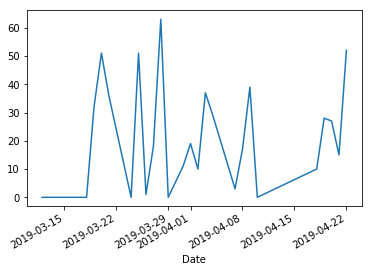

In [113]:
data.loc[:, 'Minutes Very Active'].plot()

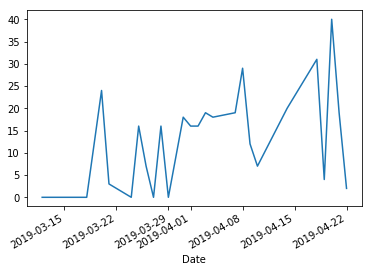

In [114]:
data.loc[:, 'Minutes Fairly Active'].plot()

There seems to be a decrease in overall Minutes Very Active and an increase in the Minutes Fairly Active spot-on at the mark of March 30th, which is when I switched from cardio-based cutting workouts to a weights-based bulking routine. There might be something there.

### Sleep Measures

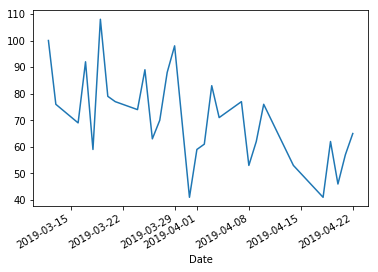

In [115]:
data.loc[:, 'Minutes Deep Sleep'].plot()

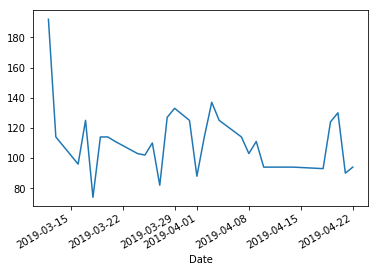

In [116]:
data.loc[:, 'Minutes REM Sleep'].plot()

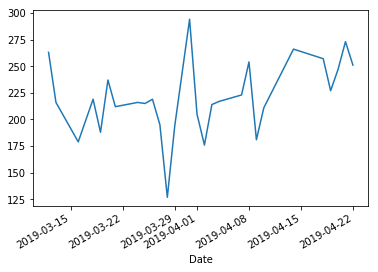

In [117]:
data.loc[:, 'Minutes Light Sleep'].plot()

There is a slight decrease in Minutes Deep Sleep that matches well with the change in workout routine.

## Linear Model

Let's see if we can fit a model to the the activity measures and deep sleep.

In [120]:
data.columns

Index(['Calories Burned', 'Steps', 'Floors', 'Minutes Sedentary',
       'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'Minutes Asleep',
       'Minutes Awake', 'Number of Awakenings', 'Minutes REM Sleep',
       'Minutes Light Sleep', 'Minutes Deep Sleep'],
      dtype='object')

I am interested in the minutes of activity. Excluding minutes of inactivity will allow me to not scale the inputs as the minutes of activity measures are on the same scale, allowing me to get a good idea of the contribution of one minute of a given level activity on the time spent in deep sleep.

In [134]:
X = data.loc[:, [
    'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active'
]].values
y = data.loc[:, 'Minutes Deep Sleep'].values
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const)
res = model.fit()

In [135]:
list(res.params)

[93.24614308477237,
 -0.12363516808353628,
 -0.5826569583120719,
 0.2620130674764157]

It seems like my baseline for deep sleep is an hour and a half per night. From there, Minutes Lightly Active and Minutes Fairly Active impact Minutes Deep Sleep negatively, with every minute of light activity reducing the time spent in deep sleep by half a minute.

On the other hand, every minute of deep activity increases my deep sleep by 26 seconds.